In [14]:
from pathlib import Path
import ast
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
from types import SimpleNamespace
from utils import get_current_dir

args = SimpleNamespace(
    inputpath=get_current_dir().parent / "data" / "results" / "result.csv",
)

df = pd.read_csv(args.inputpath)

# drop author_name, author_gender
df = df.drop(columns=["author_name", "author_gender"])

print(df.columns)
print(df.dtypes)
df

Index(['conversation_language', 'partner_name', 'author_monthly_sentiments',
       'partner_monthly_sentiments', 'author_monthly_toxicity',
       'partner_monthly_toxicity', 'partner_gender', 'topic_diversity',
       'total_messages', 'author_message_ratio', 'partner_message_ratio',
       'author_avg_word_count', 'partner_avg_word_count', 'author_media_count',
       'partner_media_count', 'author_emoji_count', 'partner_emoji_count',
       'author_url_count', 'partner_url_count', 'author_vocabulary_size',
       'partner_vocabulary_size', 'total_conversations', 'total_duration_days',
       'author_message_freq_s', 'partner_message_freq_s',
       'author_response_time_s', 'partner_response_time_s',
       'author_avg_active_time', 'partner_avg_active',
       'author_conversation_initiations', 'partner_conversation_initiations',
       'embeddings'],
      dtype='object')
conversation_language                object
partner_name                         object
author_monthly_sentim

,conversation_language,partner_name,author_monthly_sentiments,partner_monthly_sentiments,author_monthly_toxicity,partner_monthly_toxicity,partner_gender,topic_diversity,total_messages,author_message_ratio,...,total_duration_days,author_message_freq_s,partner_message_freq_s,author_response_time_s,partner_response_time_s,author_avg_active_time,partner_avg_active,author_conversation_initiations,partner_conversation_initiations,embeddings
0,de,Linus Pirker,"[0.5495279729366302, 0.5618547734618187, 0.597...","[0.5254330635070801, 0.5782329735159873, 0.576...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",m,0.090025,7109,0.652131,...,368,6859.546925,12827.208737,342.725528,316.715177,11.300475,11.892034,206,206,"[-0.03347809985280037, -0.1450592577457428, 0...."
1,en,Meryem,[0.583810047507286],[0.5411690598726273],[0.0],[0.0],f,0.029873,1545,0.535922,...,10,1012.817412,1166.731843,150.947368,106.929134,15.672705,15.217573,5,5,"[-0.13334061205387115, -0.030392566695809364, ..."
2,de,Lukas TU,[0.5484319677719703],[0.525968898315819],[0.0],[0.0],m,0.096774,120,0.591667,...,23,28321.714285,32106.250000,73.714286,46.875000,12.408451,12.673469,2,2,"[0.059835225343704224, -0.029074233025312424, ..."
3,de,Francisca Rhomberg,"[0.6061742099431845, 0.5473003796856812, 0.546...","[0.5930783847967783, 0.5963006935902496, 0.594...","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",f,0.082734,337,0.620178,...,45,18350.769230,29941.889763,621.428571,624.285714,16.153110,16.195312,20,20,"[0.09360271692276001, 0.1564306914806366, 0.16..."
4,de,Patrick Styll,"[0.5499562174081802, 0, 0, 0, 0.54667769869168...","[0.6967008709907532, 0, 0, 0, 0.57693000435829...","[0.0, 0, 0, 0, 0.0, 0.0, 0.0]","[0.0, 0, 0, 0, 0.0, 0.0, 0.0]",m,0.090426,206,0.703883,...,198,118791.666666,285094.000000,848.108108,1037.142857,15.882759,15.459016,13,13,"[0.10958530753850937, 0.12278810888528824, 0.2..."
5,de,Raffi Kattner,"[0.5750297450500986, 0.5547596621513367, 0.567...","[0.5326609754044077, 0.5573200950026512, 0.552...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",m,0.089924,4267,0.546989,...,225,8299.468495,10019.596273,600.413793,441.722320,13.504284,14.228143,127,127,"[0.18272364139556885, 0.03686937317252159, 0.2..."
6,de,Sophie Kellerberger,[0.5828090079806068],[0.5674613614877065],[0.0],[0.0],f,0.133333,35,0.628571,...,26,103142.857142,180490.000000,73.333333,450.000000,16.227273,16.846154,1,1,"[-0.03610513359308243, -0.1983744502067566, 0...."
7,de,* Laura Chaudoire,"[0.5931250670552254, 0.5532143822312355, 0.565...","[0.5586958476901054, 0.5951130899786949, 0.580...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",f,0.070835,99999,0.591256,...,301,438.460523,634.243143,205.936873,209.778463,13.835653,14.598767,350,350,"[-0.07086506485939026, 0.07520487159490585, 0...."
8,de,Max Seeliger,[0.501287134985129],[0.8145162888935634],[0.0],[0.0],m,0.117647,27,0.740741,...,1,31.578947,120.000000,45.000000,30.000000,23.000000,23.000000,0,0,"[0.11342271417379379, 0.10983209311962128, 0.0..."
9,de,Nicole Chaudoire,"[0.9810206294059753, 0.8146860748529434, 0.869...","[0.9759458899497986, 0.7020385464032491, 0.902...","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0]",f,0.114286,57,0.403509,...,229,897703.636363,598270.909090,1290.000000,1820.000000,13.260870,13.088235,12,12,"[0.015850134193897247, 0.14513789117336273, 0...."


In [15]:
print(df.columns)
print(df.dtypes)
print(df.head())

Index(['conversation_language', 'partner_name', 'author_monthly_sentiments',
       'partner_monthly_sentiments', 'author_monthly_toxicity',
       'partner_monthly_toxicity', 'partner_gender', 'topic_diversity',
       'total_messages', 'author_message_ratio', 'partner_message_ratio',
       'author_avg_word_count', 'partner_avg_word_count', 'author_media_count',
       'partner_media_count', 'author_emoji_count', 'partner_emoji_count',
       'author_url_count', 'partner_url_count', 'author_vocabulary_size',
       'partner_vocabulary_size', 'total_conversations', 'total_duration_days',
       'author_message_freq_s', 'partner_message_freq_s',
       'author_response_time_s', 'partner_response_time_s',
       'author_avg_active_time', 'partner_avg_active',
       'author_conversation_initiations', 'partner_conversation_initiations',
       'embeddings'],
      dtype='object')
conversation_language                object
partner_name                         object
author_monthly_sentim

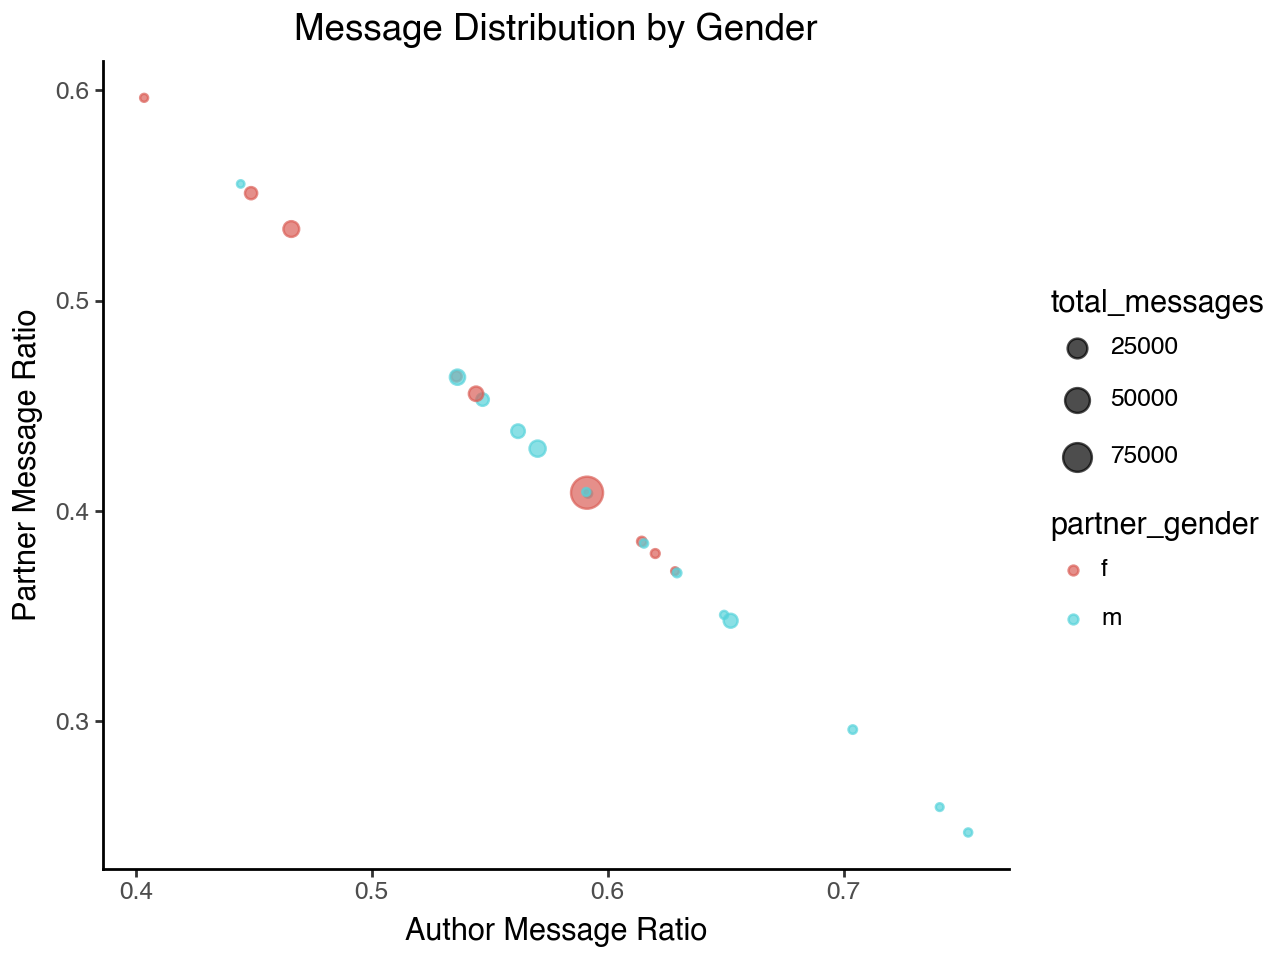

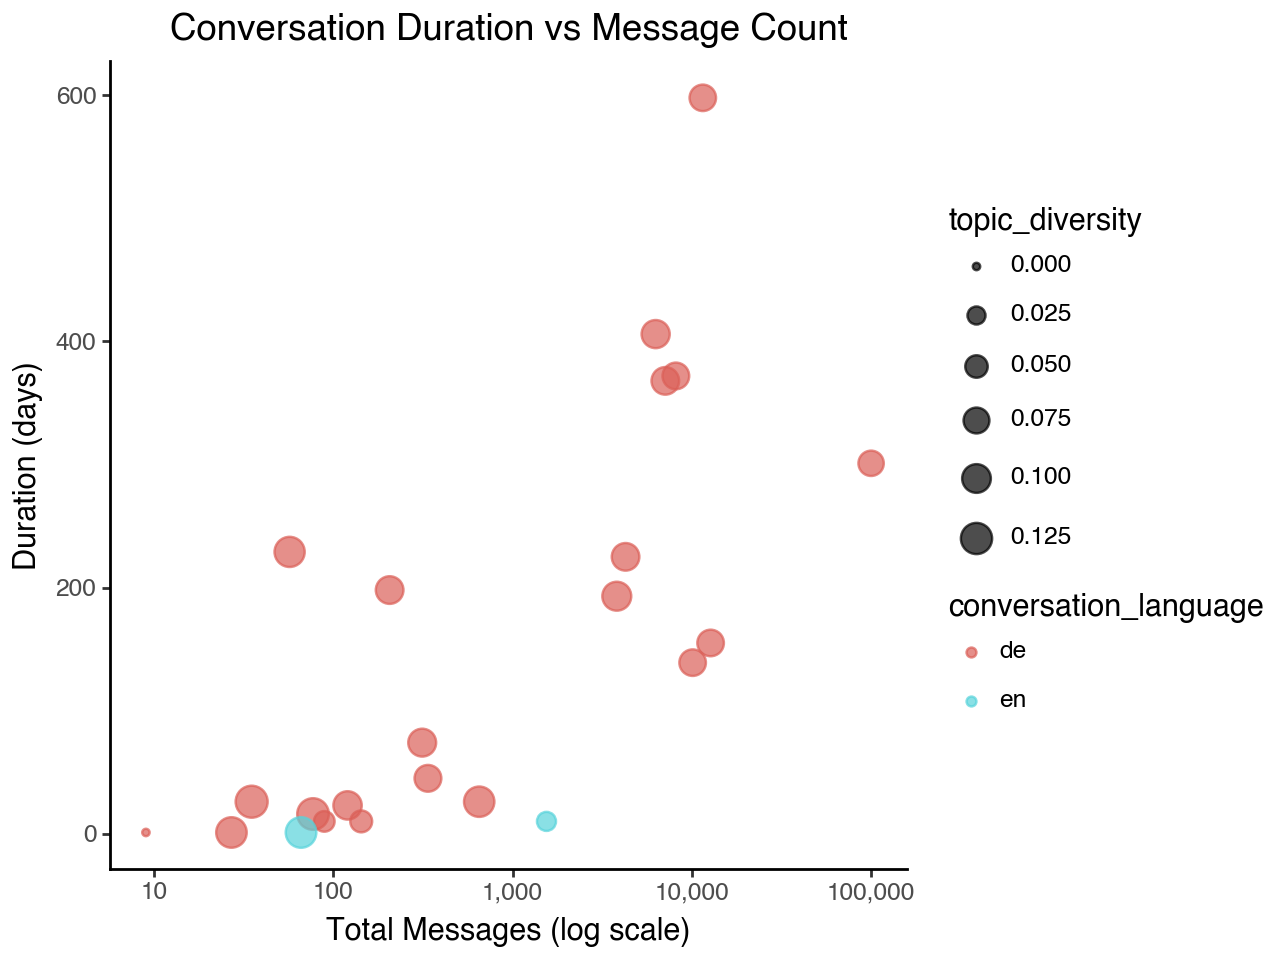

In [19]:
from plotnine import *
import pandas as pd
import numpy as np

# message distribution by gender
p1 = (ggplot(df, aes(x="author_message_ratio", y="partner_message_ratio")) +
      geom_point(aes(size="total_messages", color="partner_gender"), alpha=0.7) +
      labs(title="Message Distribution by Gender", x="Author Message Ratio", y="Partner Message Ratio") +
      theme_classic()
)
p1.show()

# communication patterns
p2 = (ggplot(df, aes(x="total_messages", y="total_duration_days")) +
      geom_point(aes(size="topic_diversity", color="conversation_language"), alpha=0.7) +
      scale_x_log10(labels=lambda l: [f"{int(v):,}" for v in l]) +
      labs(title="Conversation Duration vs Message Count", x="Total Messages (log scale)", y="Duration (days)") +
      theme_classic()
)
p2.show()